# Exploratory Data Analysis

This exploration is done to gain insights on the dataset. It is done on the train set.

In [53]:
import pandas as pd
import matplotlib as plt
import math

%matplotlib inline

## Read Data

In [3]:
train = pd.read_csv('../data/tubes2_HeartDisease_train.csv')
train.columns = ['age', 'sex', 'chest_pain_type', 'rest_blood_pressure', 'serum_cholestrol', 
                 'high_fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
                 'st_depression', 'peak_exercise_st', 'major_vessels_num', 'thal', 'diagnosis']
train_x = train.iloc[:, :13]
train_y = train.iloc[:, 13:]
train.head()

,age,sex,chest_pain_type,rest_blood_pressure,serum_cholestrol,high_fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,peak_exercise_st,major_vessels_num,thal,diagnosis
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


## Class Label Distribution

#### General descriptions:

In [4]:
train_y.describe()

,diagnosis
count,779.000000
mean,0.989730
std,1.138211
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


#### Class distribution:

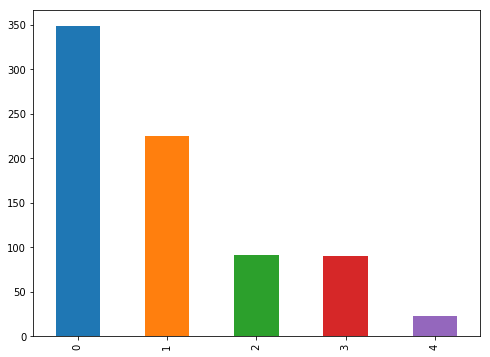

In [5]:
train_y['diagnosis'].value_counts().plot(kind='bar', figsize=(8, 6))

### Some Thougts

As we can see, the traning set is imbalanced. Class 0 is significantly overrepresented in the data while class 4 only have less than 30 examples.

Oversampling/undersampling should be done to improve the data's balance.

## Features Distribution

### A. age

#### General descriptions:

In [6]:
age = train_x['age'].astype(int)
age.describe()

count    779.000000
mean      53.509628
std        9.505017
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

#### Value distribution:

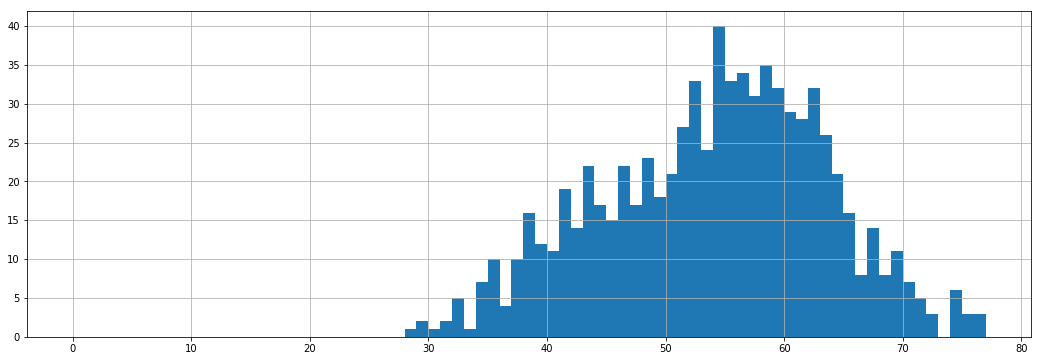

In [7]:
age.hist(bins=age.max(), range=(0, age.max()), figsize=(18, 6))

#### Box plot

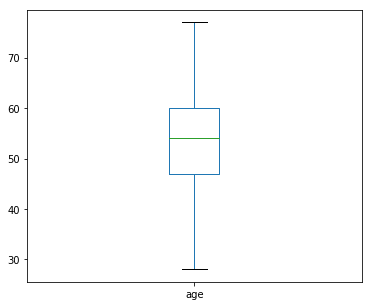

In [8]:
age.plot.box(figsize=(6, 5))

### B. sex

#### General descriptions:

In [9]:
sex = train_x['sex'].astype(int)
sex.describe()

count    779.000000
mean       0.779204
std        0.415050
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

#### Value distribution:

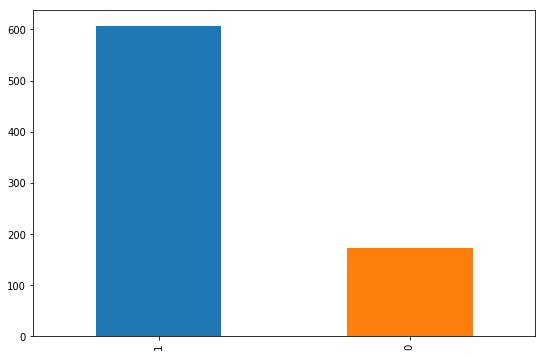

In [10]:
train_x['sex'].value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

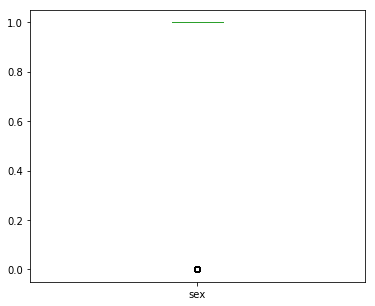

In [11]:
sex.plot.box(figsize=(6,5))

### C. chest_pain_type

#### General descriptions:

In [12]:
chest_pain = train_x['chest_pain_type'].astype(int)
chest_pain.describe()

count    779.000000
mean       3.264442
std        0.926284
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: chest_pain_type, dtype: float64

#### Value distribution:

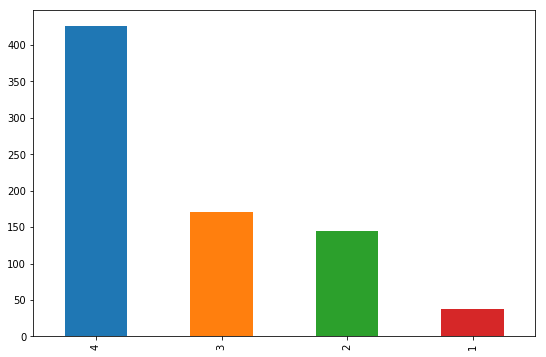

In [13]:
train_x['chest_pain_type'].value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

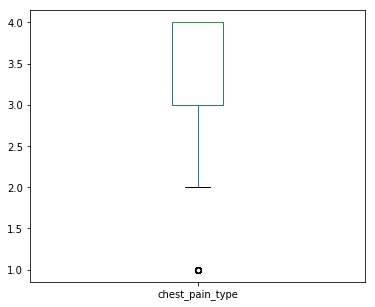

In [14]:
chest_pain.plot.box(figsize=(6, 5))

### D. rest_blood_pressure

#### Unknown values:

In [15]:
print('Num of unknown values:', 
      train_x['rest_blood_pressure'][train_x['rest_blood_pressure'] == '?'].count(),
     '/', train_x['rest_blood_pressure'].count())

Num of unknown values: 47 / 779


#### General descriptions:

In [16]:
rest_blood_pressure = train_x['rest_blood_pressure'][train_x['rest_blood_pressure'] != '?'].astype(int)
rest_blood_pressure.describe()

count    732.000000
mean     132.355191
std       19.133545
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: rest_blood_pressure, dtype: float64

#### Value distribution:

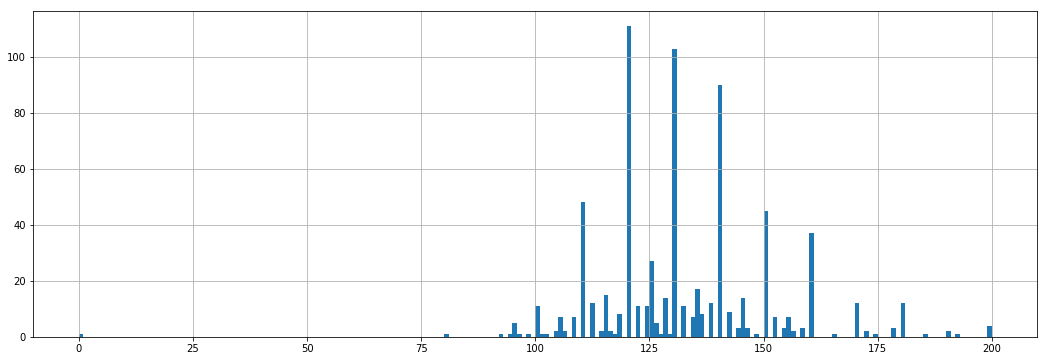

In [17]:
rest_blood_pressure.hist(bins=rest_blood_pressure.max(), figsize=(18, 6))

#### Box plot

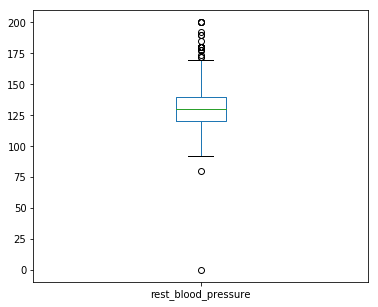

In [18]:
rest_blood_pressure.plot.box(figsize=(6, 5))

### E. serum_cholestrol

#### Unknown values:

In [19]:
print('Num of unknown values:', 
      train_x['serum_cholestrol'][train_x['serum_cholestrol'] == '?'].count(),
     '/', train_x['serum_cholestrol'].count())

Num of unknown values: 24 / 779


#### General descriptions:

In [20]:
serum_cholestrol = train_x['serum_cholestrol'][train_x['serum_cholestrol'] != '?'].astype(int)
serum_cholestrol.describe()

count    755.000000
mean     200.309934
std      109.938501
min        0.000000
25%      177.000000
50%      225.000000
75%      270.000000
max      529.000000
Name: serum_cholestrol, dtype: float64

#### Value distribution:

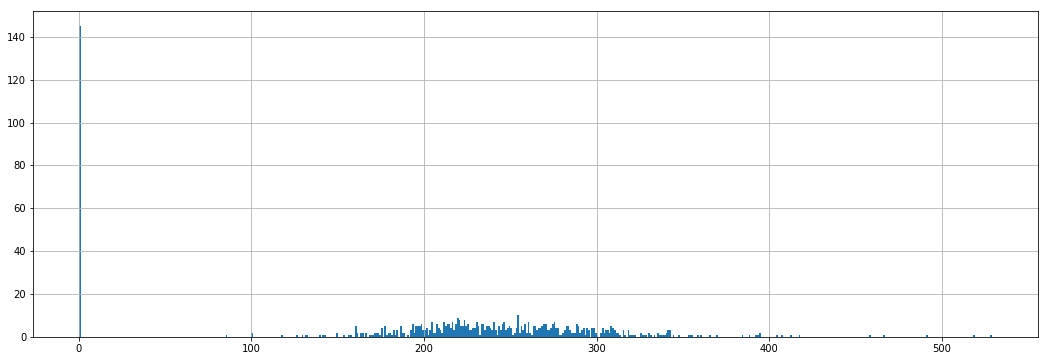

In [21]:
serum_cholestrol.hist(bins=serum_cholestrol.max(), figsize=(18, 6))

#### Box plot

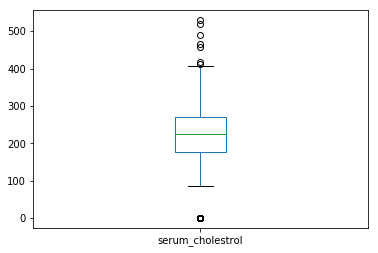

In [22]:
serum_cholestrol.plot.box()

### F. high_fasting_blood_sugar

#### Unknown values:

In [29]:
print('Num of unknown values:', 
      train_x['rest_blood_pressure'][train_x['rest_blood_pressure'] == '?'].count(),
     '/', train_x['rest_blood_pressure'].count())

Num of unknown values: 47 / 779


#### General descriptions:

In [38]:
high_fasting_blood_sugar = train_x['serum_cholestrol'][train_x['serum_cholestrol'] != '?'].astype(int)
high_fasting_blood_sugar.describe()

count    755.000000
mean     200.309934
std      109.938501
min        0.000000
25%      177.000000
50%      225.000000
75%      270.000000
max      529.000000
Name: serum_cholestrol, dtype: float64

#### Value distribution:

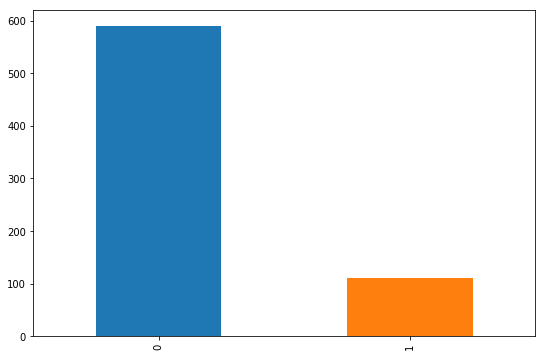

In [35]:
high_fasting_blood_sugar.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

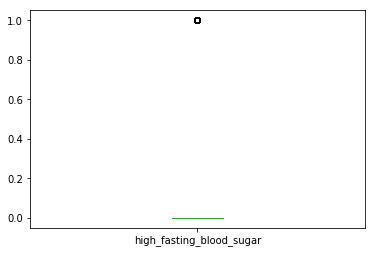

In [36]:
high_fasting_blood_sugar.plot.box()

### G. resting_ecg

#### Unknown values:

In [37]:
print('Num of unknown values:', 
      train_x['resting_ecg'][train_x['resting_ecg'] == '?'].count(),
     '/', train_x['resting_ecg'].count())

Num of unknown values: 1 / 778


#### General descriptions:

In [58]:
train_x = train_x.dropna(subset=['resting_ecg'])
resting_ecg = train_x['resting_ecg'].astype(int)
resting_ecg.describe()

count    777.000000
mean       0.603604
std        0.809026
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: resting_ecg, dtype: float64

#### Value distribution:

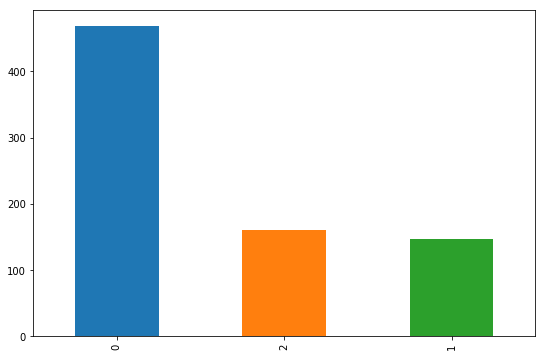

In [59]:
resting_ecg.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

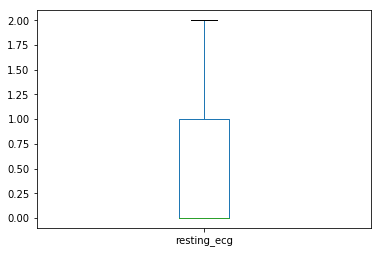

In [60]:
resting_ecg.plot.box()

### H. max_heart_rate

#### Unknown values:

In [61]:
print('Num of unknown values:', 
      train_x['max_heart_rate'][train_x['max_heart_rate'] == '?'].count(),
     '/', train_x['max_heart_rate'].count())

Num of unknown values: 44 / 777


#### General descriptions:

In [65]:
max_heart_rate = train_x['max_heart_rate'][train_x['max_heart_rate'] != '?'].astype(int)
max_heart_rate.describe()

count    733.000000
mean     138.330150
std       26.116074
min       60.000000
25%      120.000000
50%      140.000000
75%      159.000000
max      202.000000
Name: max_heart_rate, dtype: float64

#### Value distribution:

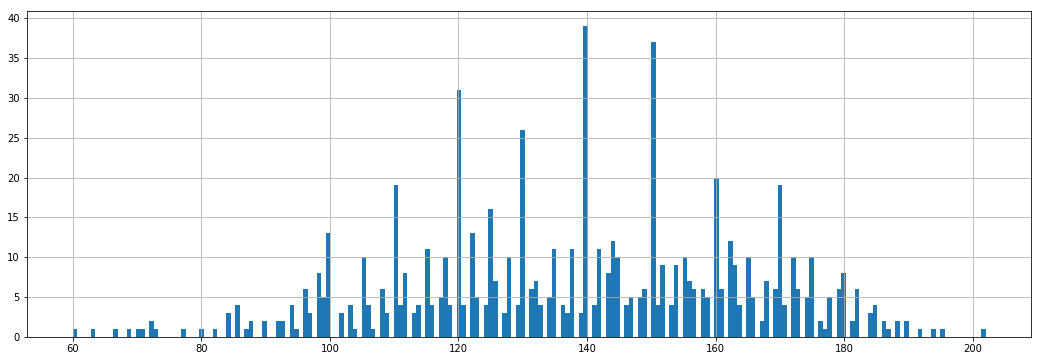

In [67]:
max_heart_rate.hist(bins=max_heart_rate.max(), figsize=(18, 6))

#### Box plot

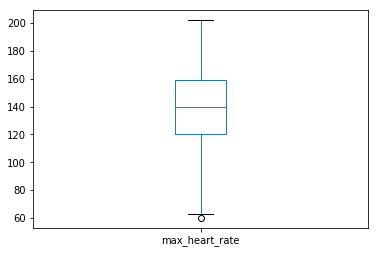

In [68]:
max_heart_rate.plot.box()

### I. exercise_induced_angina

#### Unknown values:

In [69]:
print('Num of unknown values:', 
      train_x['exercise_induced_angina'][train_x['exercise_induced_angina'] == '?'].count(),
     '/', train_x['exercise_induced_angina'].count())

Num of unknown values: 44 / 777


#### General descriptions:

In [70]:
exercise_induced_angina = train_x['exercise_induced_angina'][train_x['exercise_induced_angina'] != '?'].astype(int)
exercise_induced_angina.describe()

count    733.000000
mean       0.392906
std        0.488730
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exercise_induced_angina, dtype: float64

#### Value distribution:

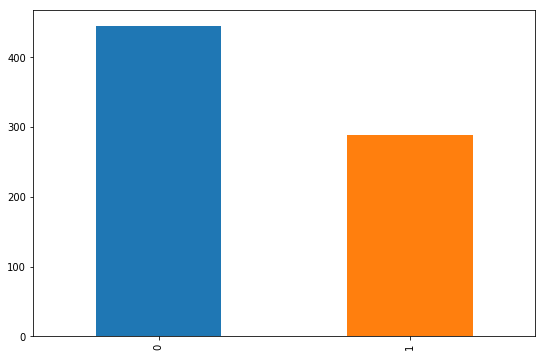

In [71]:
exercise_induced_angina.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

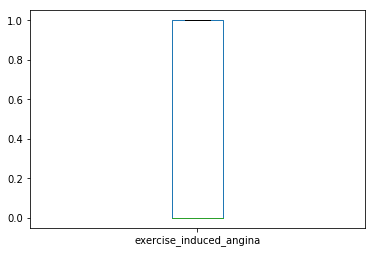

In [72]:
exercise_induced_angina.plot.box()

### J. st_depression

#### Unknown values:

In [73]:
print('Num of unknown values:', 
      train_x['st_depression'][train_x['st_depression'] == '?'].count(),
     '/', train_x['st_depression'].count())

Num of unknown values: 49 / 777


#### General descriptions:

In [75]:
st_depression = train_x['st_depression'][train_x['st_depression'] != '?'].astype(float)
st_depression.describe()

count    728.000000
mean       3.947940
std        7.796939
min       -2.600000
25%        0.000000
50%        1.000000
75%        3.000000
max       62.000000
Name: st_depression, dtype: float64

#### Value distribution:

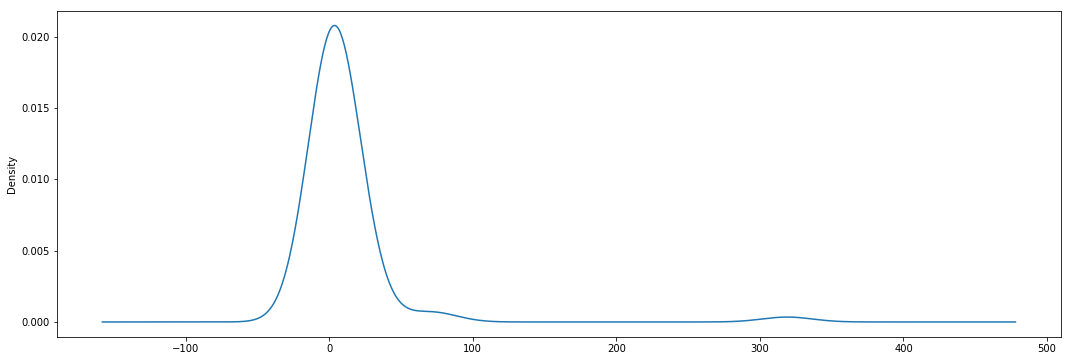

In [79]:
st_depression.value_counts().plot(kind='density', figsize=(18, 6))

#### Box plot

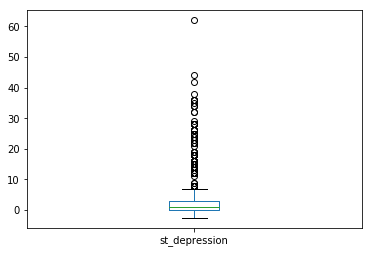

In [80]:
st_depression.plot.box()

### K. peak_exercise_st

#### Unknown values:

In [81]:
print('Num of unknown values:', 
      train_x['peak_exercise_st'][train_x['peak_exercise_st'] == '?'].count(),
     '/', train_x['peak_exercise_st'].count())

Num of unknown values: 261 / 777


#### General descriptions:

In [87]:
peak_exercise_st = train_x['peak_exercise_st'][train_x['peak_exercise_st'] != '?'].astype(int)
peak_exercise_st.describe()

count    516.000000
mean       1.763566
std        0.621859
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: peak_exercise_st, dtype: float64

#### Value distribution:

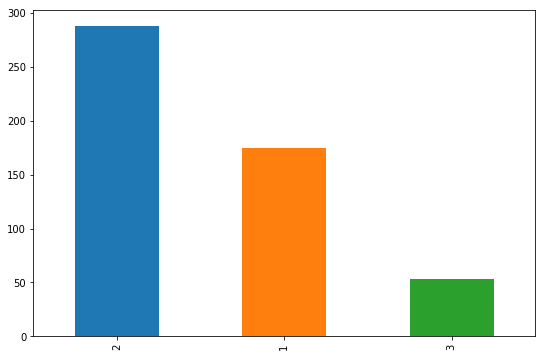

In [88]:
peak_exercise_st.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

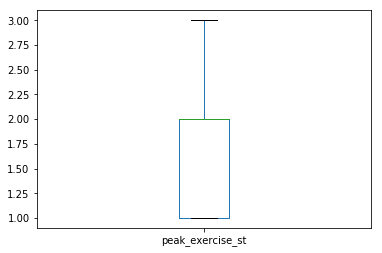

In [89]:
peak_exercise_st.plot.box()

### L. major_vessels_num

#### Unknown values:

In [90]:
print('Num of unknown values:', 
      train_x['major_vessels_num'][train_x['major_vessels_num'] == '?'].count(),
     '/', train_x['major_vessels_num'].count())

Num of unknown values: 512 / 777


#### General descriptions:

In [93]:
major_vessels_num = train_x['major_vessels_num'][train_x['major_vessels_num'] != '?'].astype(int)
major_vessels_num.describe()

count    265.000000
mean       0.686792
std        0.935422
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: major_vessels_num, dtype: float64

#### Value distribution:

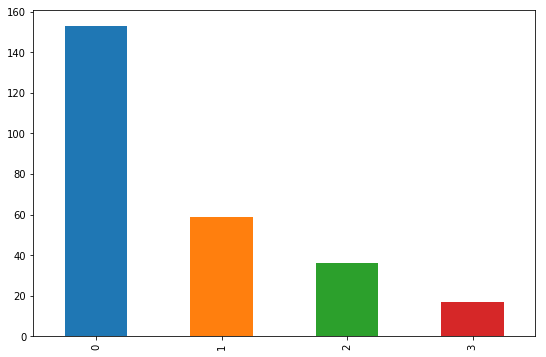

In [94]:
major_vessels_num.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

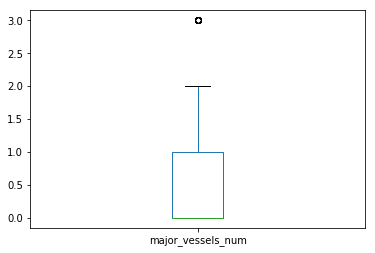

In [95]:
major_vessels_num.plot.box()

### M. thal

#### Unknown values:

In [96]:
print('Num of unknown values:', 
      train_x['thal'][train_x['thal'] == '?'].count(),
     '/', train_x['thal'].count())

Num of unknown values: 406 / 777


#### General descriptions:

In [101]:
thal = train_x['thal'][train_x['thal'] != '?'].astype(int)
thal.describe()

count    371.000000
mean       5.029650
std        1.921904
min        3.000000
25%        3.000000
50%        6.000000
75%        7.000000
max        7.000000
Name: thal, dtype: float64

#### Value distribution:

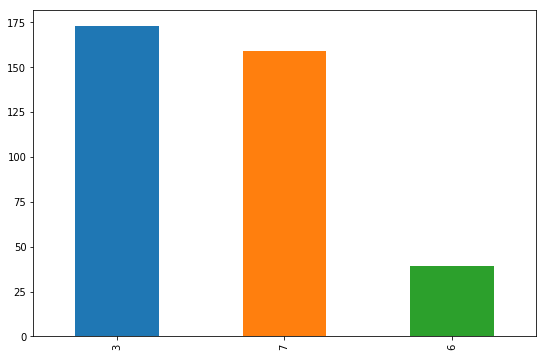

In [102]:
thal.value_counts().plot(kind='bar', figsize=(9, 6))

#### Box plot

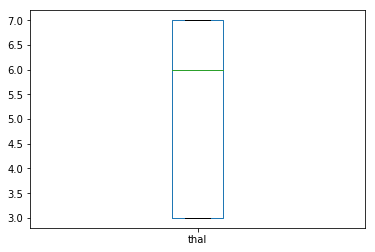

In [103]:
thal.plot.box()